In [1]:
# Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
# Import Data
df = pd.read_csv('Data_Benzene_Reduced.csv', sep=";", header=None)
df.shape

(36, 50)

In [116]:
df.rename(columns={0: 'benzene', 1: 'eq_ratio'}, inplace=True)

In [117]:
grid_shape = (6,8) # new grid size wrt statement due to NaNs

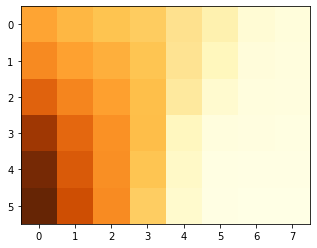

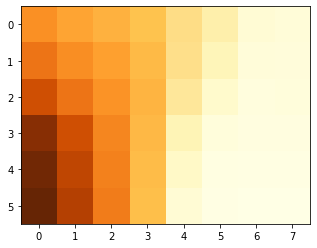

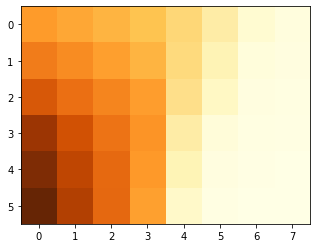

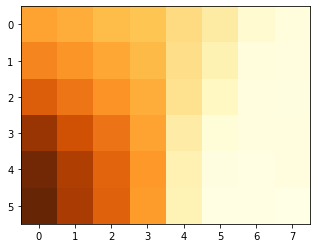

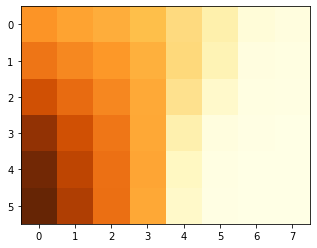

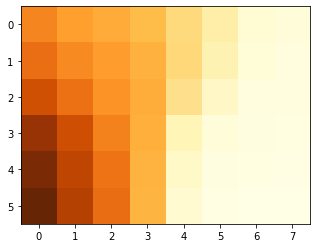

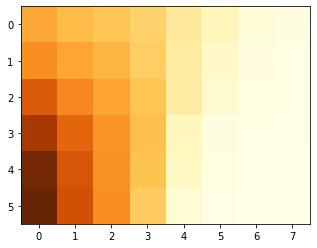

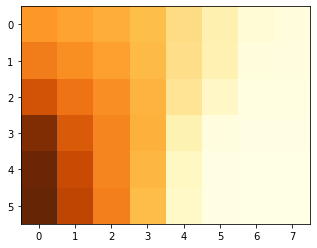

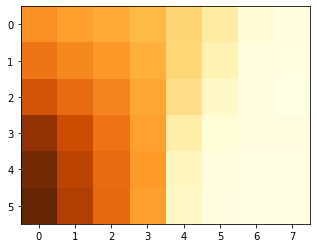

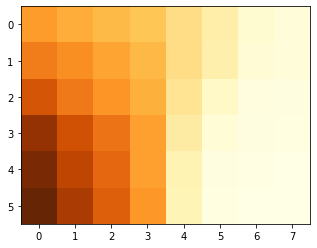

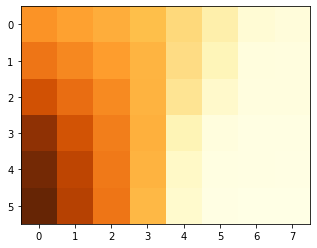

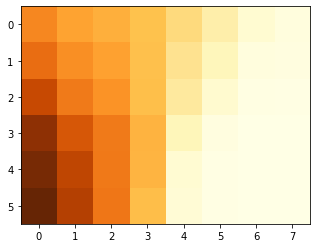

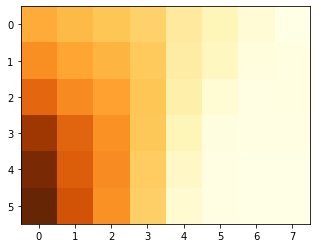

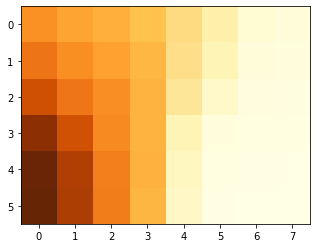

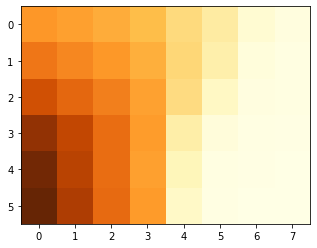

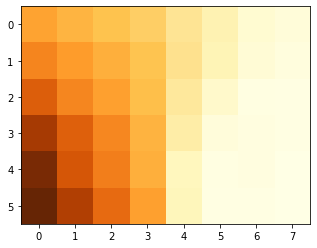

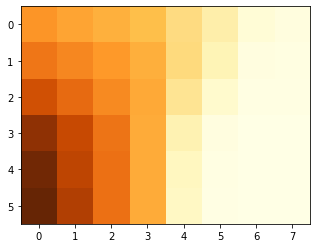

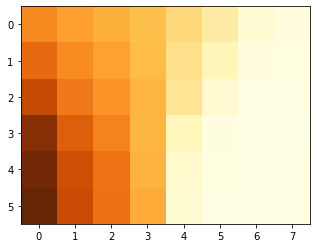

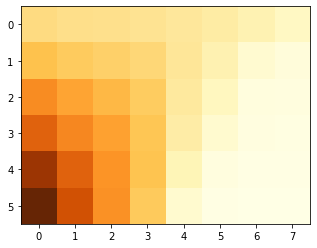

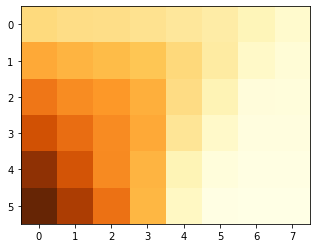

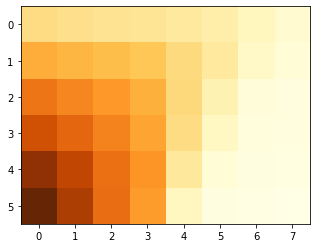

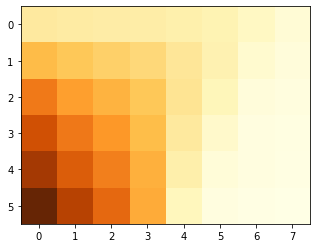

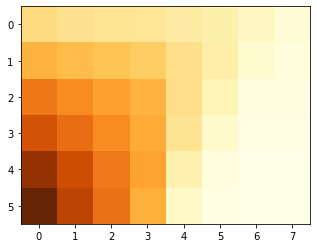

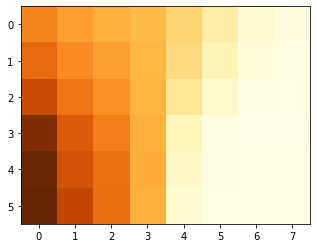

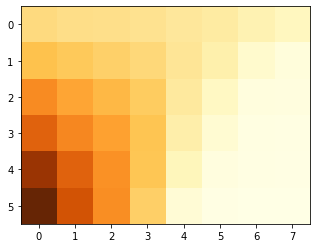

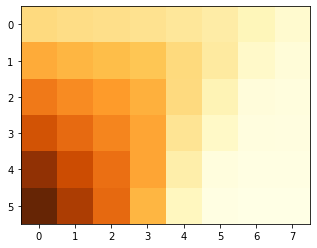

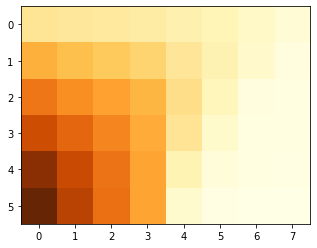

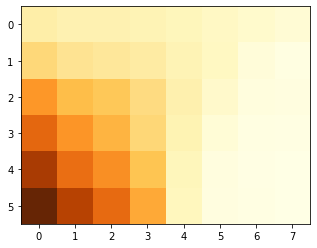

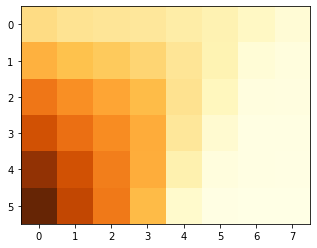

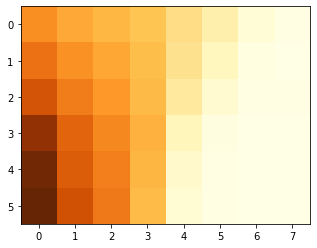

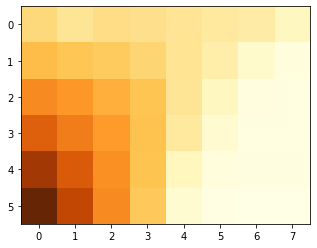

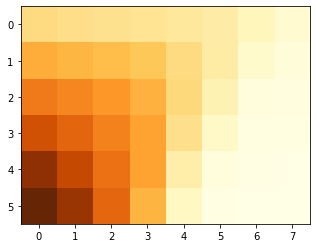

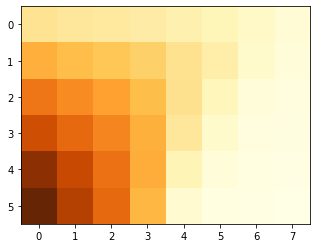

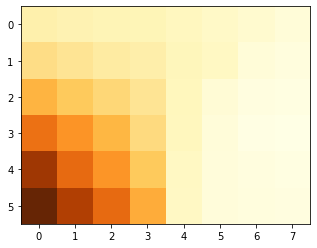

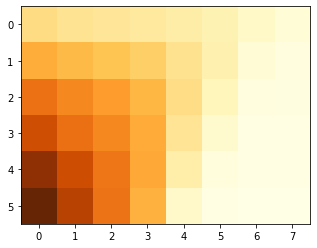

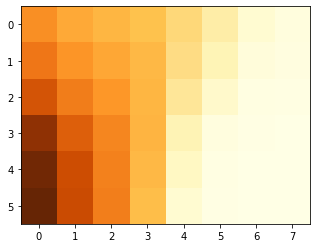

In [132]:
T = df.iloc[:,2:].to_numpy()
T_test = []
for i in range (T.shape[0]):
    T_reshaped = np.flip(T[i,:].reshape(grid_shape),axis=0)
    #print(T_reshaped)
    T_test.append(T_reshaped)
    
    plt.imshow(T_reshaped, cmap='YlOrBr')
    plt.show()

#pd.DataFrame(T_reshaped).to_csv('T_grid.csv')

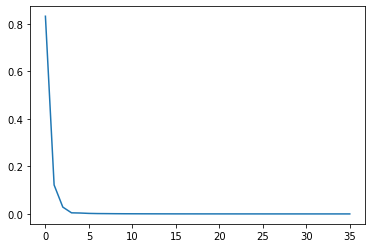

In [64]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(T)

explained_var_ratio = pca.explained_variance_ratio_
plt.plot(explained_var_ratio)
plt.show()

(48, 36)


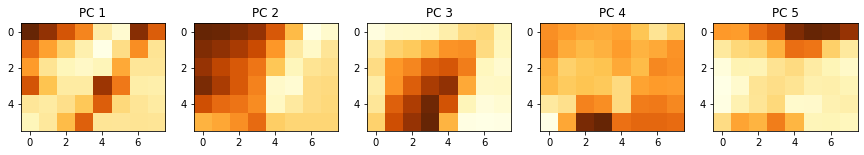

In [99]:
A = pca.components_.T
Z = T@A # X*A
print(A.shape)

n_pcs = 5
fig, axs = plt.subplots(1,n_pcs, figsize=(3*n_pcs, 3))
for i, ax in enumerate(axs):
    ax.imshow(np.flip(A[:,i].reshape(grid_shape),axis=0), cmap='YlOrBr') # to check, the flip
    ax.set_title('PC ' + str(i+1))

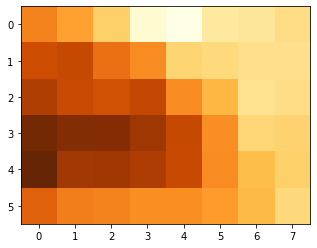

In [70]:
X_reconstructed = Z[:,:5]@A[:,:5].T
index = 0

# select the image and reshape it to show it
T_rec = X_reconstructed[index,:].reshape(grid_shape)
plt.imshow(T_rec, cmap='YlOrBr')
plt.show()

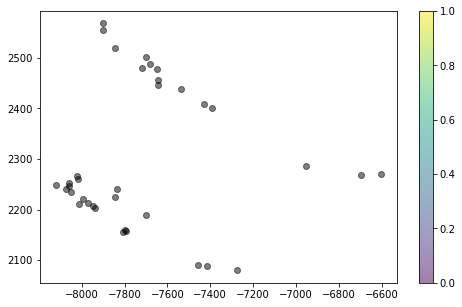

In [74]:
fig, ax = plt.subplots(figsize=(8,5))
im = ax.scatter(Z[:,0], Z[:,1], c='black', cmap=plt.cm.get_cmap('tab10', 10), alpha=0.5)
fig.colorbar(im)
plt.show()

/Users/alesspiscopo/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/alesspiscopo/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


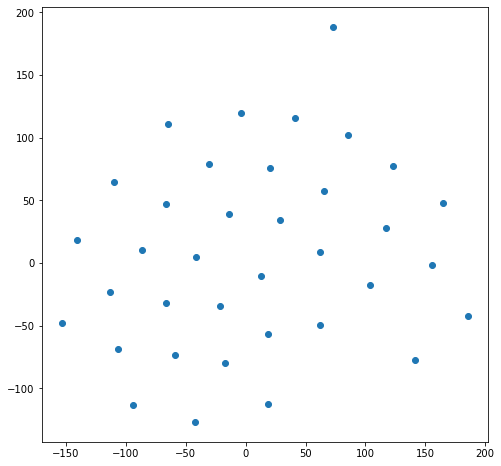

In [112]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components =2, perplexity = 30)

X_2d = tsne.fit_transform(T)
X_2d.shape

plt.figure(figsize=(8,8))
plt.scatter(X_2d[:,0],X_2d[:,1])

In [92]:
from sklearn.manifold import Isomap

(36, 48)
(36, 2)


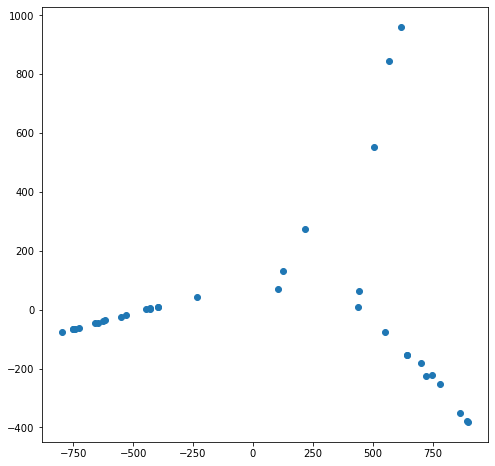

In [114]:
embedding = Isomap(n_components=2)
print(T.shape)
X_transformed = embedding.fit_transform(T)
print(X_transformed.shape)

plt.figure(figsize=(8,8))
plt.scatter(X_transformed[:,0],X_transformed[:,1])

standard: 0.0099 sec
ltsa: 0.014 sec
hessian: 0.022 sec
modified: 0.013 sec


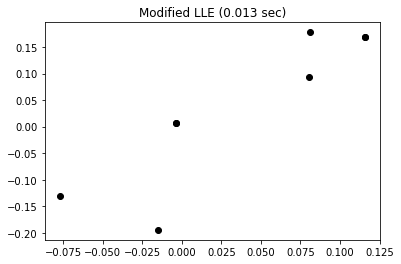

In [105]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from sklearn import manifold
from sklearn.utils import check_random_state

# Unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import warnings

methods = ["standard", "ltsa", "hessian", "modified"]
labels = ["LLE", "LTSA", "Hessian LLE", "Modified LLE"]

for i, method in enumerate(methods):
    t0 = time()
    trans_data = (
        manifold.LocallyLinearEmbedding(
            n_neighbors=6, n_components=2, method=method
        )
        .fit_transform(T)
        
    )
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(252 + i)
    plt.scatter(trans_data[0], trans_data[1], c='colors', cmap=plt.cm.rainbow)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis("tight")

se = manifold.SpectralEmbedding(n_components=2, n_neighbors=6) 
trans_data = se.fit_transform(T)
t0 = time()

with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore", message="The PCA initialization", category=FutureWarning
    )
    t0 = time()
    tsne = manifold.TSNE(
        n_components=2, init="pca", random_state=0, learning_rate="auto"
    )
    trans_data = tsne.fit_transform(T)
    t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(2, 5, 10)
plt.scatter(trans_data[0], trans_data[1], c='black', cmap=plt.cm.rainbow)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

plt.show()